In [1]:
import numpy as np
import pandas as pd


In [2]:
R = pd.read_csv('/home/santanu/Downloads/Assignment Recommendation/dataset/user-shows.txt', sep=" ", header=None)
R = np.matrix(R.values)

In [3]:
# Manipulate the 20th user and make the 1st 100 entries as zero 
# Python matrix indexing starts from 0 and hence the 20th user is in row index 19
R_man = R.copy()
R_man[19,0:100] = 0 

In [4]:
show = pd.read_csv('/home/santanu/Downloads/Assignment Recommendation/dataset/shows.txt', sep=" ", header=None)
show_ref = list(show[0].values)
show_dict,show_rev_dict = {},{}
for i in xrange(len(show_ref)):
    show_dict[i] = show_ref[i]
    show_rev_dict[show_ref[i]] = i
    

In [5]:
P = R_man*R_man.T
Q = R_man.T*R_man
p_ = np.diag(np.diag(P))
q_ = np.diag(np.diag(Q))

In [6]:
# Inverse of the L2 norm for the user vectors and the item vectors
p__ = np.sqrt(np.linalg.inv(p_))
q__ = np.sqrt(np.linalg.inv(q_))

In [7]:
# User User Similarity U_s and Item - Item similarity I_s
U_s = p__*P*p__
I_s = q__*Q*q__

In [8]:
# Recommendation Matrices
Tau_U = U_s*R_man
Tau_I = R_man*I_s

In [9]:
##Recommended movies in the 1st 100 movies for user 20 according to user similarity based recommendation score
out_scores_user_tau = pd.DataFrame()
out_scores_user_tau['index'] = xrange(100)
out_scores_user_tau['score'] = list(np.array(Tau_U[19:20,0:100])[0])
out_scores_user_tau = out_scores_user_tau.sort_values(['score'],ascending=False)
out_scores_user_tau['Show'] = out_scores_user_tau['index'].apply(lambda x:show_dict[x])
out_scores_user_tau[['Show','score']][0:5]





,Show,score
96,FOX 28 News at 10pm,666.482824
74,Family Guy,664.956977
45,2009 NCAA Basketball Tournament,588.914140
35,SpongeBob SquarePants,583.334679
60,NBC 4 at Eleven,565.554363


In [10]:
##Recommended movies in the 1st 100 movies for user 20 according to Item item similarity based recommendation score
out_scores_item_tau = pd.DataFrame()
out_scores_item_tau['index'] = xrange(100)
out_scores_item_tau['score'] = list(np.array(Tau_I[19:20,0:100])[0])
out_scores_item_tau = out_scores_item_tau.sort_values(['score'],ascending=False)
out_scores_item_tau['Show'] = out_scores_item_tau['index'].apply(lambda x:show_dict[x])
out_scores_item_tau[['Show','score']][0:5]

,Show,score
35,SpongeBob SquarePants,15.385709
63,Wow Wow Wubbzy,15.247345
96,FOX 28 News at 10pm,14.954295
74,Family Guy,14.927589
48,Max and Ruby,14.924622


In [11]:
item_sim = pd.DataFrame()
index_sim = []
scores = []
for i in xrange(100):
    for j in xrange(0,i):
        index_sim.append((i,j))
        scores.append(I_s[i,j])
        
item_sim['Index'] = index_sim
item_sim['Score'] = scores
item_sim = item_sim.sort_values(['Score'],ascending=False)
indices = item_sim.Index[:5]
k = 0 
for ind in indices:
    show_1 = show_dict[ind[0]]
    show_2 = show_dict[ind[1]]
    print (show_1,show_2,item_sim['Score'].values[k])
    k += 1

('Late Night with Jimmy Fallon', 'The Tonight Show with Jay Leno', 0.80205084310717067)
('The Daily Show with Jon Stewart', 'The Colbert Report', 0.79692398735594761)
('The Penguins of Madagascar', 'SpongeBob SquarePants', 0.79166332055515831)
('The Fairly OddParents', 'SpongeBob SquarePants', 0.79166182987988221)
('iCarly', 'SpongeBob SquarePants', 0.78783547949343369)


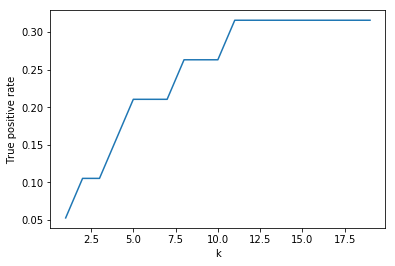

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
## User User top k evaluation
true_postive_rate_k_u = []
held_out_pos_count = np.sum(R[19,0:100] )
for k in xrange(1,20):
    count_k = 0
    out_temp = out_scores_user_tau[0:k]
    index = out_temp['index'].values
    for i in index:
        if R[19,i] == 1:
            count_k +=1 
    tpr = count_k/float(held_out_pos_count)
    true_postive_rate_k_u.append(tpr)
    
plt.plot(xrange(1,20),true_postive_rate_k_u)
plt.xlabel('k')
plt.ylabel('True positive rate')
    
    

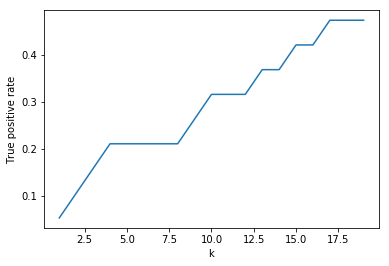

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
## Item Item top k evaluation
true_postive_rate_k_i = []
held_out_pos_count = np.sum(R[19,0:100] )
for k in xrange(1,20):
    count_k = 0
    out_temp = out_scores_item_tau[0:k]
    index = out_temp['index'].values
    for i in index:
        if R[19,i] == 1:
            count_k +=1 
    tpr = count_k/float(held_out_pos_count)
    true_postive_rate_k_i.append(tpr)
    
plt.plot(xrange(1,20),true_postive_rate_k_i)
plt.xlabel('k')
plt.ylabel('True positive rate')

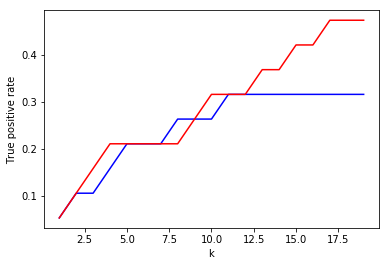

In [14]:
plt.plot(xrange(1,20),true_postive_rate_k_u,'blue',xrange(1,20),true_postive_rate_k_i,'red')
plt.xlabel('k')
plt.ylabel('True positive rate')

In [15]:
# Question 5 starts
P = R*R.T
Q = R.T*R
p_ = np.diag(np.diag(P))
q_ = np.diag(np.diag(Q))
p__ = np.sqrt(np.linalg.inv(p_))
q__ = np.sqrt(np.linalg.inv(q_))
# User User Similarity U_s and Item - Item similarity I_s
U_s = p__*P*p__
I_s = q__*Q*q__
# Recommendation Matrices
Tau_UU = U_s*R
Tau_II = R*I_s


In [16]:
out_scores_user_tauu = pd.DataFrame()
out_scores_user_tauu['index'] = xrange(R.shape[1])
out_scores_user_tauu['score'] = list(np.array(Tau_UU[19:20,:])[0])
out_scores_user_tauu = out_scores_user_tauu.sort_values(['score'],ascending=False)
out_scores_user_tauu['Show'] = out_scores_user_tauu['index'].apply(lambda x:show_dict[x])
list_user_rec = out_scores_user_tauu['index'][0:10].values
list_user_rec

array([ 96,  74, 140,  45,  60, 156,  68,  35, 137, 326])

In [17]:
out_scores_item_tauu = pd.DataFrame()
out_scores_item_tauu['index'] = xrange(R.shape[1])
out_scores_item_tauu['score'] = list(np.array(Tau_II[19:20,:])[0])
out_scores_item_tauu = out_scores_item_tauu.sort_values(['score'],ascending=False)
out_scores_item_tauu['Show'] = out_scores_item_tauu['index'].apply(lambda x:show_dict[x])
list_item_rec = out_scores_item_tauu['index'][0:10].values
list_item_rec

array([144,  96,  35,  74, 155, 173, 205,  63, 140, 145])

In [18]:
recs = []
for i in xrange(R.shape[0]):
    for j in xrange(R.shape[1]):
        if R[i,j] == 1:
            rec = str(i) + ' ' + str(j)
            recs.append(rec)

outfile = open('recomm.txt', 'w')

for item in recs:
  outfile.write("%s\n" % item)
outfile.close()
            

In [168]:
WRMF = pd.read_csv('/home/santanu/Downloads/Assignment Recommendation/MyMediaLite-3.11/lib/mymedialite/output_wrmf.txt', sep="\t", header=None)
WRMF_20 = WRMF[WRMF[0] == 19][1]
array_str = WRMF_20.values[0][1:-1]
pairs = array_str.split(',')
showid,score = [],[]
for p in pairs:
    showid.append(int(p.split(':')[0]))
    score.append(float(p.split(':')[1]))
    
scores_WRMF = pd.DataFrame()
scores_WRMF['showid'] = showid
scores_WRMF['score'] = score
scores_WRMF = scores_WRMF.sort_values(['score'],ascending=False)
wrmf =  scores_WRMF['showid'][:10].values

wrmf 



array([ 48,  77, 192, 208, 280, 195, 207, 222, 219, 489])

In [166]:
itemknn = pd.read_csv('/home/santanu/Downloads/Assignment Recommendation/MyMediaLite-3.11/lib/mymedialite/output_ItemKNN.txt', sep="\t", header=None)
itemknn_20 = itemknn[itemknn[0] == 19][1]
array_str = itemknn_20.values[0][1:-1]
pairs = array_str.split(',')
showid,score = [],[]
for p in pairs:
    showid.append(int(p.split(':')[0]))
    score.append(float(p.split(':')[1]))
    
scores_knn = pd.DataFrame()
scores_knn['showid'] = showid
scores_knn['score'] = score
scores_knn = scores_knn.sort_values(['score'],ascending=False)
ItemKNN = scores_knn['showid'][:10].values

ItemKNN 


array([234,  48,  37, 543, 490, 477, 280, 553, 489, 222])

In [171]:
recomm_df = pd.DataFrame()
recomm_df['Item-item'] = list_item_rec
recomm_df['User-user'] = list_user_rec
recomm_df['ItemKNN'] = list(ItemKNN)
recomm_df['WRMF'] = list(wrmf)

In [198]:
# the list of recomendation
recomm_df

,Item-item,User-user,ItemKNN,WRMF
0,144,96,234,48
1,96,74,48,77
2,35,140,37,192
3,74,45,543,208
4,155,60,490,280
5,173,156,477,195
6,205,68,280,207
7,63,35,553,222
8,140,137,489,219
9,145,326,222,489


In [173]:
# index of shows
outitem = set(list_item_rec).union(set(list_user_rec),set(ItemKNN),set(wrmf))
outitem = list(outitem)
outlabel = [show_dict[int(item)] for item in outitem]
index_shows = pd.DataFrame()
index_shows['ShowID'] =outitem
index_shows['ShowName'] = outlabel
index_shows

,ShowID,ShowName
0,192,Handy Manny
1,195,Imagination Movers
2,68,Today
3,326,10TV Eyewitness News at 6:00
4,207,Happy Monster Band
5,137,10TV Eyewitness News at 5:00
6,74,Family Guy
7,140,10TV News HD at 11pm
8,205,The Backyardigans
9,77,Disney's Mickey Mouse Clubhouse


In [196]:
from scipy import stats
out_kt = np.zeros((rec_mat.shape[1],rec_mat.shape[1]))
rec_mat = recomm_df.values
for i in xrange(rec_mat.shape[1]):
    for j in xrange(rec_mat.shape[1]):
        out_kt[i,j] = stats.kendalltau(rec_mat[:,i],rec_mat[:,j])[0]
        
print 'kendal Tau correlation:'
print out_kt

kendal Tau correlation:
[[ 1.          0.2        -0.02222222  0.06666667]
 [ 0.2         1.         -0.55555556 -0.11111111]
 [-0.02222222 -0.55555556  1.          0.37777778]
 [ 0.06666667 -0.11111111  0.37777778  1.        ]]


In [178]:
# kendal tau correlation 
recomm_df.corr(method='kendall')

,Item-item,User-user,ItemKNN,WRMF
Item-item,1.000000,0.200000,-0.022222,0.066667
User-user,0.200000,1.000000,-0.555556,-0.111111
ItemKNN,-0.022222,-0.555556,1.000000,0.377778
WRMF,0.066667,-0.111111,0.377778,1.000000


In [197]:
###################################################
# Kendal tao distance from Kendall Tao correlation
# total pairs n(n-1)/2 = 10*9/2 = 45
##################################################
def kendall_tau(kendall_corr,pairs):
    concor_minus_discor = kendall_corr*pairs
    discor = (pairs - concor_minus_discor)/2.0
    kendall_dist = discor/float(pairs)
    return np.round(kendall_dist,7)

kendall_tau(out_kt,45)
       

array([[ 0.       ,  0.4      ,  0.5111111,  0.4666667],
       [ 0.4      ,  0.       ,  0.7777778,  0.5555556],
       [ 0.5111111,  0.7777778,  0.       ,  0.3111111],
       [ 0.4666667,  0.5555556,  0.3111111,  0.       ]])